# Step 0: Setup Environment

### Install New Libraries

In [1]:
# !pip install folium
# !pip install missingno

In [2]:
# imports libraries
import pandas as pd 
import numpy as np 
import datetime as datetime 
import missingno as msno
import plotly.express as px
import folium
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# notebook configurations
pd.set_option('display.max_columns', None)

### Import Data from CSVs

In [172]:
# import data for csvs
fcn_20 = pd.read_csv('mark43_fieldcontacts_name_for_public_2020.csv')
fc_20 = pd.read_csv('mark43_fieldcontacts_for_public_2020.csv')
cir_20 = pd.read_csv('crime_incident_report_2020.csv')


fcn_19_1 = pd.read_csv('rms_fieldcontacts_name_for_public_2019.csv')
fc_19_1 = pd.read_csv('rms_fieldcontacts_for_public_2019.csv')

fcn_19_2 = pd.read_csv('mark43_fieldcontacts_name_for_public_2019.csv')
fc_19_2 = pd.read_csv('mark43_fieldcontacts_for_public_2019.csv')

cir_19 = pd.read_csv('crime_incident_report_2019.csv')

In [209]:
zip_codes = pd.read_csv('US Zip Codes from 2013 Government Data.csv').rename(columns = {'ZIP':'zip','LAT':'Lat','LNG':'Long'})

In [173]:
fcn_19 = pd.concat([fcn_19_1, fcn_19_2])
fc_19 = pd.concat([fc_19_1, fc_19_2])

# Step 1: Early EDA

In [174]:
# .head() looking at the first few columns
# display(fcn.head(3), fc.head(3), cir.head(3))

In [175]:
# shape to understand columns number of rows and columns
# display(fcn.shape, fc.shape, cir.shape)

In [176]:
# .info() to understand the data types
# display(fcn.info(), fc.info(), cir.info())

### Plot Missing and Incomplete Data

In [177]:
# sparse data for hair style, skin tone, other clothing, license_type
# msno.matrix(fcn, figsize=(10, 5),sparkline=False);

In [178]:
# sparse data for vehicle and stop duration columns
# msno.matrix(fc, figsize=(10, 5), sparkline=False);

In [179]:
# missing data from offense code group and ucr part
# msno.matrix(cir,figsize=(10, 5), sparkline=False);

In [200]:
# grabbing the columns of interest for 2020
fcn_20_df = fcn_20[['fc_num','contact_date','sex','race','age']]

fc_20_df = fc_20[['fc_num','contact_date','supervisor','street','city','zip','state',
            'circumstance','basis','key_situations']]

cir_20_df = cir_20[['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','DISTRICT',
              'REPORTING_AREA','OCCURRED_ON_DATE','YEAR', 'MONTH','DAY_OF_WEEK', 
              'HOUR', 'STREET','Lat','Long','Location']]

In [201]:
# grabbing the columns of interest for 2019
fcn_19_df =fcn_19[['fc_num','contact_date','sex','race','age']]

fc_19_df = fc_19[['fc_num','contact_date','supervisor','street','city','zip','state',
            'circumstance','basis','key_situations']]

cir_19_df = cir_19[['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','DISTRICT',
              'REPORTING_AREA','OCCURRED_ON_DATE','YEAR', 'MONTH','DAY_OF_WEEK', 
              'HOUR', 'STREET','Lat','Long','Location']]

In [213]:
fcn_19_20 = pd.concat([fcn_20_df, fcn_19_df])

fc_19_20 = pd.concat([fc_20_df, fc_19_df])

# merge fc and fcn to create one datafram
combined_fc_df = fc_19_20.merge(fcn_19_20, on = 'fc_num', how = 'left')
fc_19_20 = fc_19_20.merge(zip_codes, on='zip', how ='left' )

cir_19_20 = pd.concat([cir_20_df, cir_19_df])

In [183]:
# msno.matrix(combined_fc_df,figsize=(10, 5), sparkline=False);

In [218]:
# create date and month values
cir_19_20['DATE'] = pd.to_datetime(cir_19_20['OCCURRED_ON_DATE']).dt.date

In [215]:
# create date and month values
fc_19_20['DATE'] = pd.to_datetime(fc_19_20['contact_date']).dt.date
fc_19_20['MONTH'] = pd.to_datetime(fc_19_20['contact_date']).dt.month

In [220]:
# create time series data frame
fc_ts_df = fc_19_20.groupby('DATE').agg({'fc_num':'count'}).reset_index()
cir_ts_df = cir_19_20.groupby('DATE').agg({'INCIDENT_NUMBER':'count'}).reset_index()

# merge both dataframes to create plot (line chart)
merged_ts_df = fc_ts_df.merge(cir_ts_df ,on='DATE' ,how='outer')

In [231]:
merged_ts_df.corr()

,fc_num,INCIDENT_NUMBER
fc_num,1.000000,0.515977
INCIDENT_NUMBER,0.515977,1.000000


In [230]:
merged_ts_df.corr('spearman')

,fc_num,INCIDENT_NUMBER
fc_num,1.000000,0.535924
INCIDENT_NUMBER,0.535924,1.000000


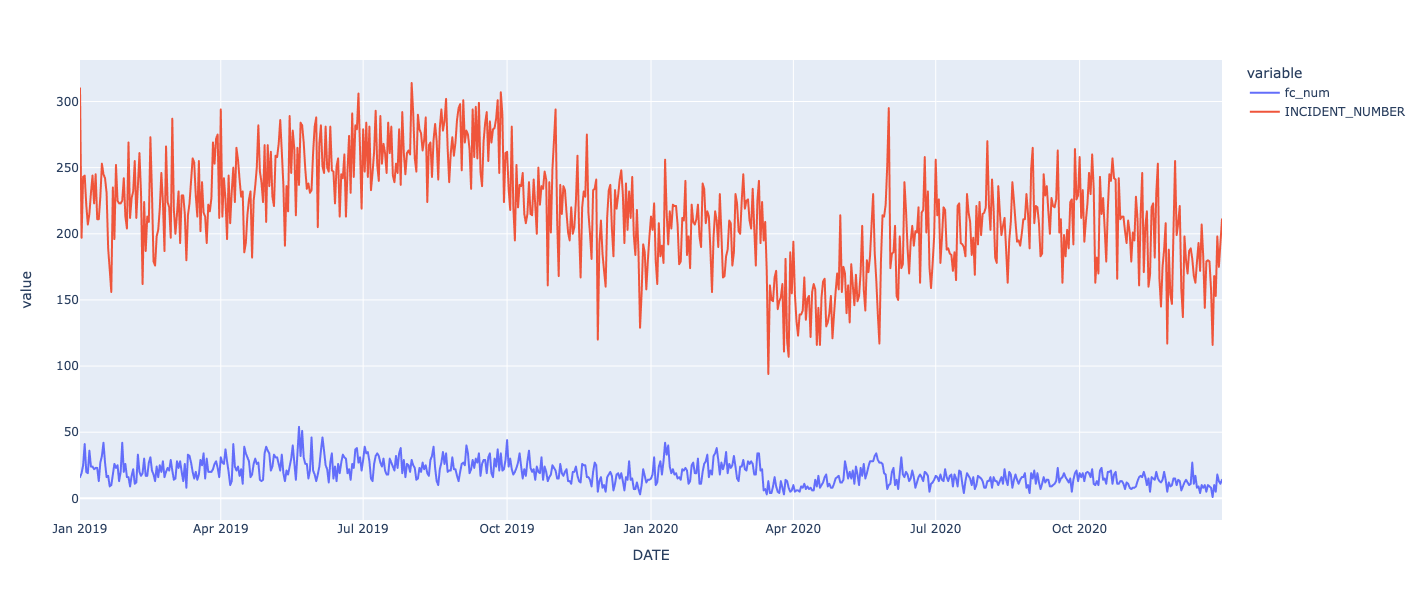

In [228]:
px.line(merged_ts_df,
       x = 'DATE' ,
       y = ['fc_num','INCIDENT_NUMBER'],
       height = 600,
       width = 1200)

In [ ]:
# create time series data frame
fc_ts_df = fc_19_20.groupby('DATE').agg({'fc_num':'count'}).reset_index()
cir_ts_df = cir_19_20.groupby('DATE').agg({'INCIDENT_NUMBER':'count'}).reset_index()

# merge both dataframes to create plot (line chart)
merged_ts_df = fc_ts_df.merge(cir_ts_df ,on='DATE' ,how='outer')

In [233]:
fc_19_20.head()

,fc_num,contact_date,supervisor,street,city,zip,state,circumstance,basis,key_situations,Lat,Long,DATE,MONTH
0,FC20000004,2020-01-01 00:00:00,80411.0,NaN,BOSTON,2128,MA,Stopped,Reasonable Suspicion,NaN,42.361129,-71.006975,2020-01-01,1
1,FC20000075,2020-01-01 00:00:00,10163.0,MAGAZINE ST,ROXBURY,2119,MA,Encountered,Encounter,NaN,42.324029,-71.085017,2020-01-01,1
2,FC20000001,2020-01-01 01:30:00,10092.0,DORCHESTER ST,BOSTON,2127,MA,Encountered,Reasonable Suspicion,NaN,42.334992,-71.039093,2020-01-01,1
3,FC20000002,2020-01-01 06:53:00,11586.0,BOYLSTON ST,BOSTON,2199,MA,Encountered,Encounter,Body Worn Camera,42.347476,-71.082035,2020-01-01,1
4,FC20000003,2020-01-01 10:02:00,12283.0,ANNUNCIATION,ROXBURY,2120,MA,Stopped,Probable Cause,"Body Worn Camera, Juvenile, Warrant Arrest",42.332090,-71.096545,2020-01-01,1


In [246]:
fc_19_20.basis.unique

<bound method Series.unique of 0        Reasonable Suspicion 
1                    Encounter
2        Reasonable Suspicion 
3                    Encounter
4               Probable Cause
                 ...          
14049                    Intel
14050     Reasonable Suspicion
14051           Probable Cause
14052                Encounter
14053           Probable Cause
Name: basis, Length: 14054, dtype: object>

In [254]:
fcn_19_20.to_excel('fcn_19_20.xlsx')

In [255]:
fc_19_20.to_excel('fc_19_20.xlsx')

In [256]:
cir_19_20.to_excel('cir_19_20.xlsx')

In [351]:
offense  = ["ANIMAL","ANIMAL","ANIMAL","ANIMAL","ANIMAL","ASSAULT","ASSAULT","ASSAULT","ASSAULT","ASSAULT","ASSAULT","CHINS","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DISORDERLY CONDUCT","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","DRUGS","FIRE REPORTS","FIRE REPORTS","FIRE REPORTS","FIRE REPORTS","FIRE REPORTS","FIRE REPORTS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FIREARMS","FRAUD","FRAUD","FRAUD","FRAUD","FRAUD","FRAUD","FRAUD","FRAUD","FRAUD","FRAUD","HARASSMENT","HARASSMENT","HARASSMENT","HARASSMENT","HAZARDOUS CONDITIONS","HAZARDOUS CONDITIONS","HEAVY MACHINERY","HEAVY MACHINERY","HEAVY MACHINERY","HEAVY MACHINERY","HEAVY MACHINERY","HEAVY MACHINERY","HOMICIDE","HOMICIDE","HOMICIDE","INVESTIGATION","INVESTIGATION","INVESTIGATION","INVESTIGATION","INVESTIGATION","KIDNAPPING","KIDNAPPING","KIDNAPPING","LANDLORD","MISCELLANEOUS","MISCELLANEOUS","MISCELLANEOUS","MISCELLANEOUS","MISCELLANEOUS","MISCELLANEOUS","MISCELLANEOUS","MISCELLANEOUS","MISCELLANEOUS","MISSING PERSON","MISSING PERSON","MISSING PERSON","MISSING PROPERTY","MISSING PROPERTY","MISSING PROPERTY","MISSING PROPERTY","MISSING PROPERTY","MISSING PROPERTY","MISSING PROPERTY","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","MOTORIZED VEHICLE","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROPERTY THEFT","PROSTITUTION","PROSTITUTION","PROSTITUTION","ROBBERY","ROBBERY","ROBBERY","ROBBERY","ROBBERY","ROBBERY","ROBBERY","SICK ASSIST","SICK ASSIST","SICK ASSIST","SUICIDE","SUICIDE","VANDALISM","VANDALISM","VANDALISM","VICE","VICE","WARRANT","WARRANT","WARRANT"]
code = [3403,2613,3002,3402,3410,800,400,413,423,801,802,2608,3350,2400,3303,2641,2642,2628,2407,2600,2401,3305,3300,2671,2619,2660,2405,3304,2632,2604,2657,2403,2610,3301,2010,2617,1815,1807,1850,1870,1846,2102,1831,2006,1847,1806,1825,1845,1800,1805,1844,1874,1848,1830,1841,2007,2101,1842,1849,1843,1832,1810,3123,3122,900,2612,3160,3108,1502,3016,1500,1504,1510,2618,2648,1503,3119,2662,1501,1200,1000,1100,1201,1109,1001,1108,1106,1107,1102,2672,2629,2670,2647,3620,3625,2950,2906,2914,2900,2907,2905,990,100,111,3000,3102,3001,3114,3115,2500,2511,2622,3112,
99999,3100,3170,3116,3110,3106,3109,3111,3007,3503,3501,3502,3203,3200,3202,3208,3205,3207,3201,121,3004,3811,3821,3810,3807,3805,3830,3820,3801,3803,3802,3831,618,561,650,670,2631,700,2616,541,500,560,562,736,542,612,531,600,1304,611,641,521,727,1300,522,735,706,540,615,520,616,724,619,617,613,614,1603,1601,1602,381,300,351,371,311,361,301,3018,3005,3006,3029,3008,1400,1415,1402,2204,2646,3130,3126,3125,]

test = dict(zip(code,offense))

In [313]:
offense_code_mapping = {3403:"ANIMAL",2613:"ANIMAL",3002:"ANIMAL",3402:"ANIMAL",3410:"ANIMAL",800:"ASSAULT",400:"ASSAULT",413:"ASSAULT",423:"ASSAULT",801:"ASSAULT",
                        802:"ASSAULT",2608:"CHINS",3350:"DISORDERLY CONDUCT",2400:"DISORDERLY CONDUCT",3303:"DISORDERLY CONDUCT",2641:"DISORDERLY CONDUCT",
                        2642:"DISORDERLY CONDUCT",2628:"DISORDERLY CONDUCT",2407:"DISORDERLY CONDUCT",2600:"DISORDERLY CONDUCT",2401:"DISORDERLY CONDUCT",
                        3305:"DISORDERLY CONDUCT",3300:"DISORDERLY CONDUCT",2671:"DISORDERLY CONDUCT",2619:"DISORDERLY CONDUCT",2660:"DISORDERLY CONDUCT",
                        2405:"DISORDERLY CONDUCT",3304:"DISORDERLY CONDUCT",2632:"DISORDERLY CONDUCT",2604:"DISORDERLY CONDUCT",2657:"DISORDERLY CONDUCT",
                        2403:"DISORDERLY CONDUCT",2610:"DISORDERLY CONDUCT",3301:"DISORDERLY CONDUCT",2010:"DRUGS",2617:"DRUGS",1815:"DRUGS",1807:"DRUGS",
                        1850:"DRUGS",1870:"DRUGS",1846:"DRUGS",2102:"DRUGS",1831:"DRUGS",2006:"DRUGS",1847:"DRUGS",1806:"DRUGS",1825:"DRUGS",1845:"DRUGS",
                        1800:"DRUGS",1805:"DRUGS",1844:"DRUGS",1874:"DRUGS",1848:"DRUGS",1830:"DRUGS",1841:"DRUGS",2007:"DRUGS",2101:"DRUGS",1842:"DRUGS",
                        1849:"DRUGS",1843:"DRUGS",1832:"DRUGS",1810:"DRUGS",3123:"FIRE REPORTS",3122:"FIRE REPORTS",900:"FIRE REPORTS",2612:"FIRE REPORTS",
                        3160:"FIRE REPORTS",3108:"FIRE REPORTS",1502:"FIREARMS",3016:"FIREARMS",1500:"FIREARMS",1504:"FIREARMS",1510:"FIREARMS",2618:"FIREARMS",
                        2648:"FIREARMS",1503:"FIREARMS",3119:"FIREARMS",2662:"FIREARMS",1501:"FIREARMS",1200:"FRAUD",1000:"FRAUD",1100:"FRAUD",1201:"FRAUD",1109:"FRAUD",
                        1001:"FRAUD",1108:"FRAUD",1106:"FRAUD",1107:"FRAUD",1102:"FRAUD",2672:"HARASSMENT",2629:"HARASSMENT",2670:"HARASSMENT",2647:"HARASSMENT",
                        3620:"HAZARDOUS CONDITIONS",3625:"HAZARDOUS CONDITIONS",2950:"HEAVY MACHINERY",2906:"HEAVY MACHINERY",2914:"HEAVY MACHINERY",2900:"HEAVY MACHINERY",
                        2907:"HEAVY MACHINERY",2905:"HEAVY MACHINERY",990:"HOMICIDE",100:"HOMICIDE",111:"HOMICIDE",3000:"INVESTIGATION",3102:"INVESTIGATION",3001:"INVESTIGATION",
                        3114:"INVESTIGATION",3115:"INVESTIGATION",2500:"KIDNAPPING",2511:"KIDNAPPING",2622:"KIDNAPPING",3112:"LANDLORD",99999:"MISCELLANEOUS",3100:"MISCELLANEOUS",
                        3170:"MISCELLANEOUS",3116:"MISCELLANEOUS",3110:"MISCELLANEOUS",3106:"MISCELLANEOUS",3109:"MISCELLANEOUS",3111:"MISCELLANEOUS",3007:"MISCELLANEOUS",
                        3503:"MISSING PERSON",3501:"MISSING PERSON",3502:"MISSING PERSON",3203:"MISSING PROPERTY",3200:"MISSING PROPERTY",3202:"MISSING PROPERTY",
                        3208:"MISSING PROPERTY",3205:"MISSING PROPERTY",3207:"MISSING PROPERTY",3201:"MISSING PROPERTY",121:"MOTORIZED VEHICLE",3004:"MOTORIZED VEHICLE",
                        3811:"MOTORIZED VEHICLE",3821:"MOTORIZED VEHICLE",3810:"MOTORIZED VEHICLE",3807:"MOTORIZED VEHICLE",3805:"MOTORIZED VEHICLE",3830:"MOTORIZED VEHICLE",
                        3820:"MOTORIZED VEHICLE",3801:"MOTORIZED VEHICLE",3803:"MOTORIZED VEHICLE",3802:"MOTORIZED VEHICLE",3831:"MOTORIZED VEHICLE",618:"PROPERTY THEFT",
                        561:"PROPERTY THEFT",650:"PROPERTY THEFT",670:"PROPERTY THEFT",2631:"PROPERTY THEFT",700:"PROPERTY THEFT",2616:"PROPERTY THEFT",541:"PROPERTY THEFT",
                        500:"PROPERTY THEFT",560:"PROPERTY THEFT",562:"PROPERTY THEFT",736:"PROPERTY THEFT",542:"PROPERTY THEFT",612:"PROPERTY THEFT",531:"PROPERTY THEFT",
                        600:"PROPERTY THEFT",1304:"PROPERTY THEFT",611:"PROPERTY THEFT",641:"PROPERTY THEFT",521:"PROPERTY THEFT",727:"PROPERTY THEFT",1300:"PROPERTY THEFT",
                        522:"PROPERTY THEFT",735:"PROPERTY THEFT",706:"PROPERTY THEFT",540:"PROPERTY THEFT",615:"PROPERTY THEFT",520:"PROPERTY THEFT",616:"PROPERTY THEFT",
                        724:"PROPERTY THEFT",619:"PROPERTY THEFT",617:"PROPERTY THEFT",613:"PROPERTY THEFT",614:"PROPERTY THEFT",1603:"PROSTITUTION",1601:"PROSTITUTION",
                        1602:"PROSTITUTION",381:"ROBBERY",300:"ROBBERY",351:"ROBBERY",371:"ROBBERY",311:"ROBBERY",361:"ROBBERY",301:"ROBBERY",3018:"SICK ASSIST",
                        3005:"SICK ASSIST",3006:"SICK ASSIST",3029:"SUICIDE",3008:"SUICIDE",1400:"VANDALISM",1415:"VANDALISM",1402:"VANDALISM",2204:"VICE",2646:"VICE",
                        3130:"WARRANT",3126:"WARRANT",3125:"WARRANT"}

In [322]:
race_mapping = {"Black":"Black","American Indian or Alaskan Native":"Other",
                "Native American / Alaskan Native":"Other","Native Hawaiian or Other Pacific Islander":"Other",
                "Native Hawaiian / Other Pacific Islander":"Other","Other":"Other","Asian":"Other",
                np.NaN:"Unknown","Unknown":"Unknown","White":"White"}

In [314]:
cir_19_20['offense_group'] = cir_19_20['OFFENSE_CODE'].replace(offense_code_mapping)
fcn_19_20['race_grouped'] = fcn_19_20['race'].replace(race_mapping)

In [341]:
def frequency_table(df, groupby, col, name):
    """
    The function asks as an aggregator. By using the split apply combine method, 
    we group the data and produce the counts and percent of totals.
    """
    
    # grouping offense codes into meaningful representations and then
    grouped = df.groupby(groupby)[[col]]\
            .count().reset_index()\
            .rename(columns = {col:f'{name}_count'})\
            .sort_values(by = f'{name}_count', ascending=False)
    
    grouped[f'percent_of_{name}'] = np.round(grouped.iloc[::,1] / grouped.sum()[1],4)
    return grouped    

In [349]:
# frequency_table(cir_19_20,'offense_group', 'INCIDENT_NUMBER', 'incident')

In [350]:
# frequency_table(fcn_19_20,'race_grouped', 'fc_num', 'encounter')

In [362]:
cir_19_20['YEAR'].value_counts()

2019    87184
2020    70894
Name: YEAR, dtype: int64

In [355]:
cir_19_20.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,DATE,offense_group
0,854652314,3115,INVESTIGATE PERSON,B2,289,2020-02-20 00:00:00,2020,February,Thursday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2020-02-20 00:00:00,INVESTIGATION
1,457856954,3115,INVESTIGATE PERSON,B2,289,2020-02-21 01:42:00,2020,February,Friday,1,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2020-02-21 01:42:00,INVESTIGATION
2,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,2020-04-24 13:00:00,2020,April,Friday,13,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)",2020-04-24 13:00:00,FRAUD


month over month diff from chris

In [369]:
 # compute yearly difference for each month
cir_19_20['DATE'] = pd.to_datetime(cir_19_20['OCCURRED_ON_DATE'])

cir_19_20['MONTH'] = cir_19_20['DATE'].dt.month_name()

monthly_count_df = cir_19_20.groupby(['MONTH','YEAR'])['INCIDENT_NUMBER'].count().reset_index().rename(columns=dict(INCIDENT_NUMBER='crime_count'))
monthly_count_df['diff'] = monthly_count_df.groupby('MONTH')['crime_count'].diff().fillna("")
monthly_count_df['pct_diff'] = np.round(monthly_count_df.groupby('MONTH')['crime_count'].pct_change() *100,2).fillna("")

monthly_count_df[monthly_count_df.YEAR == 2020]

,MONTH,YEAR,crime_count,diff,pct_diff
1,April,2020,4387,-2576.0,-37.0
3,August,2020,6533,-1897.0,-22.5
5,December,2020,5602,-691.0,-10.98
7,February,2020,5897,-276.0,-4.47
9,January,2020,6342,-616.0,-8.85
11,July,2020,6236,-1847.0,-22.85
13,June,2020,5925,-1710.0,-22.4
15,March,2020,5513,-1580.0,-22.28
17,May,2020,5439,-2344.0,-30.12
19,November,2020,5770,-698.0,-10.79


convert to the function

from chris

this allows us to map color via hex code to each unique item in our list

In [ ]:
# intialize list of items from df
categories = crime_incident_reports['OFFENSE_DESCRIPTION'].to_list()

# initialize color mapping
color_map = {}

# assign random color to each category in column
for cat in categories:
    r = lambda: random.randint(0,255)
    hex = '#%02X%02X%02X' % (r(),r(),r())
    if cat in color_map.keys():
        pass
    else:
        color_map[cat] = hex

# print color mapping
color_map_df = pd.DataFrame.from_dict(color_map, orient='index', columns=['hex']).reset_index().rename(columns=dict(index='OFFENSE_DESCRIPTION'))

crime_incident_reports_color = crime_incident_reports.merge(color_map_df, on='OFFENSE_DESCRIPTION', how='left')